<a href="https://colab.research.google.com/github/Stuti0711/Deep-Learning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with keras

In [4]:
from warnings  import filterwarnings
filterwarnings ('ignore')

# Step 1: Read the dataset

In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2: Perform basic data quality checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
df.duplicated().sum()

41

In [11]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [12]:

df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


#Seperate X and Y (PE)


In [21]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [22]:

X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [15]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4: Preprocess X using pipeline

In [16]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [18]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')



In [20]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Apply Train Test split

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [26]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [27]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [28]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [29]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [30]:
xtrain.shape

(7621, 4)

In [31]:
xtest.shape

(1906, 4)

In [32]:
xtrain.shape[1]

4

# Step 5: Build the neural network
Hidden Layer use relu as activation function

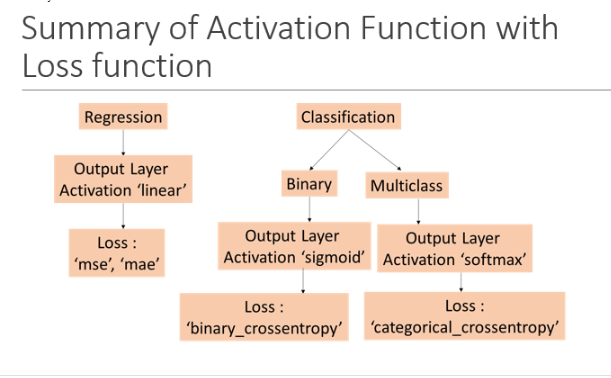

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [40]:

# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [41]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")


In [42]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 5s 4ms/step - loss: 202661.8438 - mae: 449.8097 - val_loss: 194222.3906 - val_mae: 440.2917
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 170210.8906 - mae: 411.2466 - val_loss: 136222.9844 - val_mae: 367.3802
Epoch 3/60
239/239 [==============================] - 1s 3ms/step - loss: 94582.8906 - mae: 298.3827 - val_loss: 53430.5000 - val_mae: 216.3477
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 33057.1367 - mae: 159.0995 - val_loss: 19829.8379 - val_mae: 119.4486
Epoch 5/60
239/239 [==============================] - 1s 3ms/step - loss: 16587.6914 - mae: 109.6827 - val_loss: 12984.2090 - val_mae: 97.1534
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 11163.3125 - mae: 89.6217 - val_loss: 8688.4219 - val_mae: 78.9187
Epoch 7/60
239/239 [==============================] - 1s 3ms/step - loss: 7265.5664 - mae: 71.9948 - val_loss: 5477.6807 - val_mae: 62.1

In [43]:
hist.history["loss"]

[202661.84375,
 170210.890625,
 94582.890625,
 33057.13671875,
 16587.69140625,
 11163.3125,
 7265.56640625,
 4576.228515625,
 2888.71337890625,
 1875.46044921875,
 1280.1942138671875,
 922.0899658203125,
 687.2279052734375,
 522.0894165039062,
 397.4651184082031,
 301.1610412597656,
 230.12806701660156,
 177.97213745117188,
 138.95956420898438,
 108.72406005859375,
 86.55230712890625,
 70.4793472290039,
 59.174964904785156,
 50.82051086425781,
 44.516483306884766,
 39.52583312988281,
 35.63631057739258,
 32.79543685913086,
 30.318603515625,
 28.630537033081055,
 27.116788864135742,
 25.82362937927246,
 25.00589942932129,
 24.10233497619629,
 23.484848022460938,
 22.86708641052246,
 22.518333435058594,
 22.01643943786621,
 21.60784149169922,
 21.2688045501709,
 20.951847076416016,
 20.86526107788086,
 20.529024124145508,
 20.311874389648438,
 20.423154830932617,
 19.97622299194336,
 19.849262237548828,
 19.808691024780273,
 19.617111206054688,
 19.561037063598633,
 19.689661026000977,


In [44]:
hist.history['val_loss']

[194222.390625,
 136222.984375,
 53430.5,
 19829.837890625,
 12984.208984375,
 8688.421875,
 5477.6806640625,
 3433.828857421875,
 2169.67138671875,
 1441.800537109375,
 1017.6990356445312,
 753.08984375,
 574.215087890625,
 436.6805419921875,
 329.8486633300781,
 246.71145629882812,
 189.6722412109375,
 146.60154724121094,
 114.54653930664062,
 91.44009399414062,
 72.50304412841797,
 61.20990753173828,
 51.92524719238281,
 45.239376068115234,
 39.689579010009766,
 36.61162185668945,
 32.64759063720703,
 30.345426559448242,
 28.61105728149414,
 27.17731285095215,
 25.689311981201172,
 24.722885131835938,
 23.983524322509766,
 22.990209579467773,
 23.51985740661621,
 22.871538162231445,
 21.861352920532227,
 20.95146369934082,
 21.141765594482422,
 20.4766788482666,
 20.06492042541504,
 21.2233829498291,
 19.8166561126709,
 19.46401023864746,
 19.590295791625977,
 19.212791442871094,
 19.987565994262695,
 19.843006134033203,
 18.7643985748291,
 19.617679595947266,
 18.536277770996094,
 

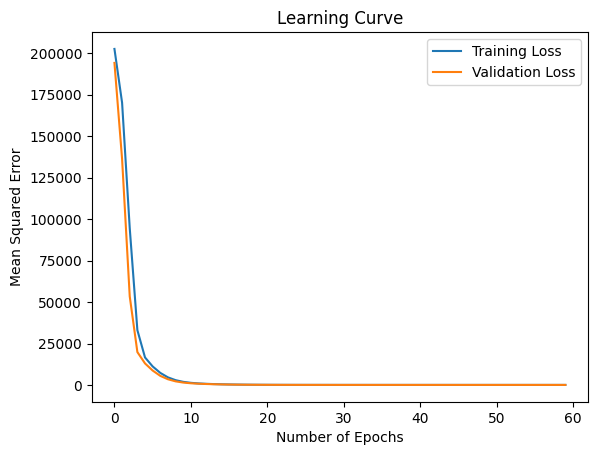

In [45]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label = "Training Loss")
plt.plot(hist.history['val_loss'], label = "Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [46]:
model.evaluate(xtrain ,ytrain)

239/239 [==============================] - 0s 2ms/step - loss: 20.0609 - mae: 3.4952


[20.060882568359375, 3.4951841831207275]

In [47]:
model.evaluate(xtest , ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.4637 - mae: 3.4652


[19.463727951049805, 3.4651763439178467]

# Predict the results for train and test

In [48]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [49]:
ypred_train[0:5]

array([[450.09933],
       [479.05368],
       [466.62964],
       [430.52304],
       [466.4675 ]], dtype=float32)

In [50]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [51]:
ypred_test[0:5]

array([[426.70328],
       [481.48883],
       [482.1257 ],
       [448.62527],
       [444.9434 ]], dtype=float32)

In [52]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [53]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9302048048803053

In [54]:
# R2 score in test
r2_score(ytest, ypred_test)

0.935505648213522

## Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [55]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [56]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [57]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [59]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[443.46185],
       [438.1417 ],
       [427.06528],
       [438.29953],
       [473.30103]], dtype=float32)

In [60]:
xnew["PowerOutput_pred"] = preds


In [61]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,443.461853
1,28.88,54.89,1007.16,46.60,438.141693
2,27.89,73.21,1001.32,85.88,427.065277
3,25.69,62.26,1011.38,74.08,438.299530
4,12.16,40.81,1025.79,70.97,473.301025
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.436096
96,11.78,39.96,1011.37,82.95,472.121918
97,5.62,41.38,1020.91,86.21,483.012878
98,24.96,74.99,1008.25,80.52,433.991882


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

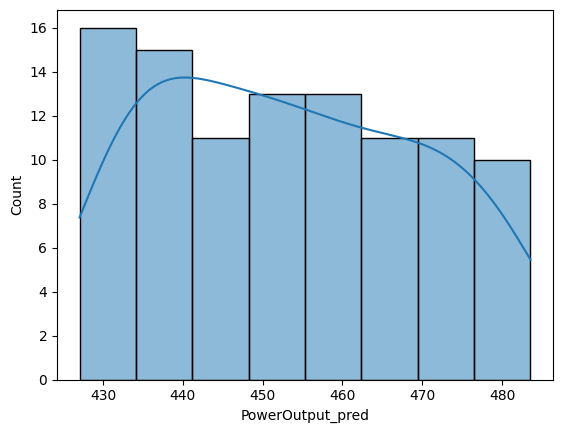

In [62]:
import seaborn as sns
sns.histplot(data = xnew ,x="PowerOutput_pred", kde = True)

In [63]:
xnew.to_csv("Results.csv", index = False)